I used Goggle Collab Notebook

First Step is mounting my google drive

In [129]:
#Change it if you will use any other data source
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Reading Sample Sales Data CSV file

In [130]:
import pandas as pd

# Define the path to your CSV file in Google Drive
csv_file_path = "/content/drive/MyDrive/a/AIQ-Challenge/data/sales_data.csv"

# Load the CSV file into a DataFrame
sales_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(sales_df.head())

   order_id  customer_id  product_id  quantity  price  order_date
0      2334            5          40         3  35.60  2022-06-21
1      6228            8          13         7  36.52  2023-03-08
2      7784            9          44         4  46.56  2023-04-22
3      6588            5          26         1  15.87  2022-10-23
4      5910            8          32        10  77.00  2022-10-05


Data Checks

In [131]:
# Check for missing values
missing_values = sales_df.isnull().sum()
print(missing_values)


order_id       0
customer_id    0
product_id     0
quantity       0
price          0
order_date     0
dtype: int64


In [132]:
# Check data types
data_types = sales_df.dtypes
print(data_types)

order_id         int64
customer_id      int64
product_id       int64
quantity         int64
price          float64
order_date      object
dtype: object


In [133]:
# Check for duplicates
duplicate_rows = sales_df[sales_df.duplicated()]
print(duplicate_rows)

# Remove duplicates
sales_df = sales_df.drop_duplicates()

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, price, order_date]
Index: []


In [134]:
# Summary statistics
summary_stats = sales_df.describe()
print(summary_stats)

          order_id  customer_id   product_id     quantity        price
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean   5539.816000     5.633000    25.587000     5.571000    55.041080
std    2656.608141     2.871682    14.478054     2.801215    25.594854
min    1007.000000     1.000000     1.000000     1.000000    10.070000
25%    3194.750000     3.000000    13.000000     3.000000    32.917500
50%    5658.000000     6.000000    25.000000     6.000000    54.040000
75%    7897.000000     8.000000    38.000000     8.000000    76.605000
max    9992.000000    10.000000    50.000000    10.000000    99.780000


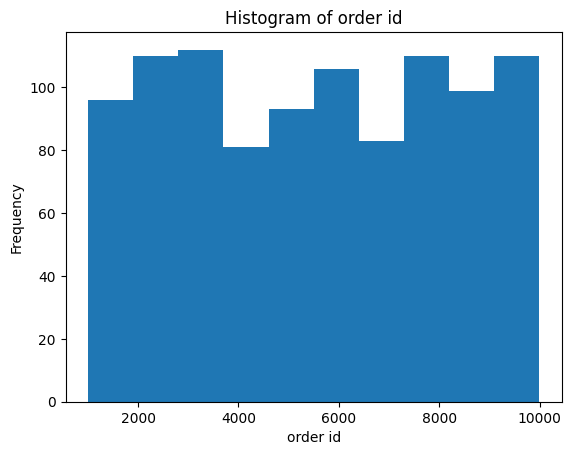

In [135]:
import matplotlib.pyplot as plt

# Order ID : Histogram
plt.hist(sales_df['order_id'])
plt.xlabel('order id')
plt.ylabel('Frequency')
plt.title('Histogram of order id')
plt.show()

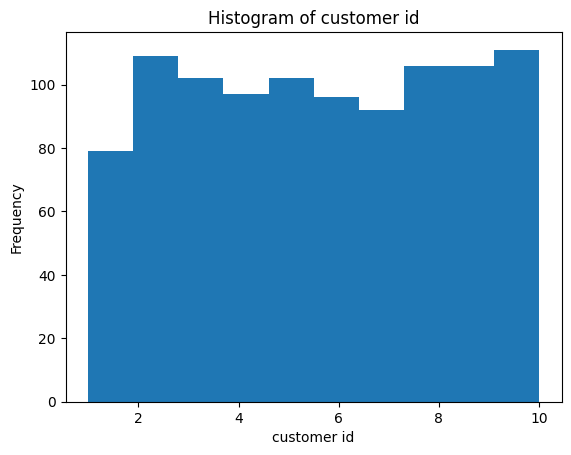

In [136]:
# Customer ID : Histogram
plt.hist(sales_df['customer_id'])
plt.xlabel('customer id')
plt.ylabel('Frequency')
plt.title('Histogram of customer id')
plt.show()

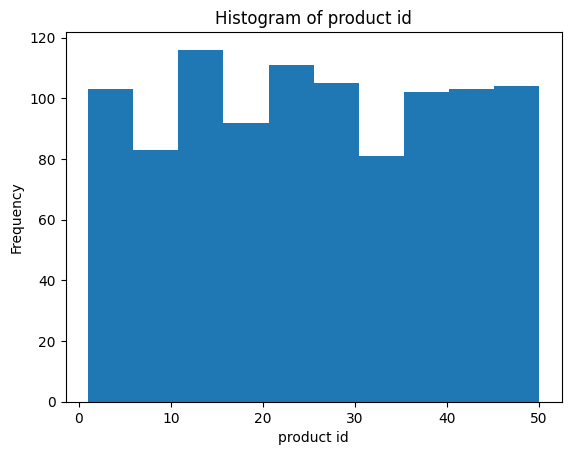

In [137]:
# Product ID : Histogram
plt.hist(sales_df['product_id'])
plt.xlabel('product id')
plt.ylabel('Frequency')
plt.title('Histogram of product id')
plt.show()

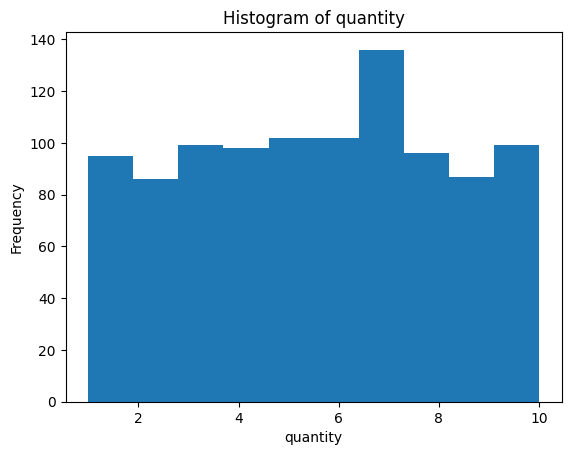

In [138]:
# Quantity : Histogram
plt.hist(sales_df['quantity'])
plt.xlabel('quantity')
plt.ylabel('Frequency')
plt.title('Histogram of quantity')
plt.show()

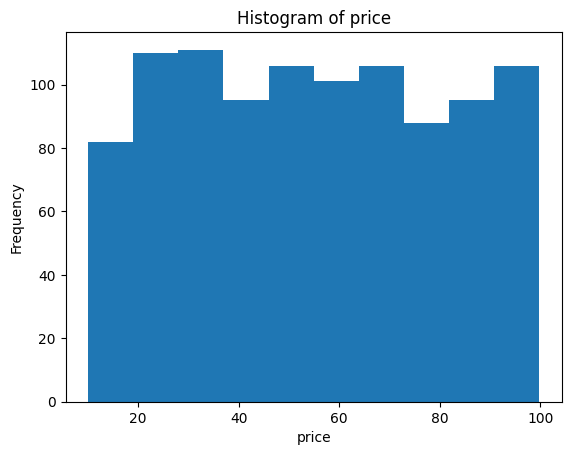

In [139]:
# Price : Histogram
plt.hist(sales_df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of price')
plt.show()

Checking the date format of order_date


In [140]:
expected_format = '%Y-%m-%d'

# Try to convert the column to datetime with the expected format
try:
    sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format=expected_format)
    print("Date format is correct.")
except ValueError:
    print("Date format is incorrect.")

Date format is correct.


Fetch user data from the JSONPlaceholder API

In [141]:
from ctypes import addressof
import requests

base_url = "https://jsonplaceholder.typicode.com"
users_endpoint = "/users"
url = f"{base_url}{users_endpoint}"

response = requests.get(url)
if response.status_code == 200:
    # Parse the JSON response
    users_data = response.json()
else:
    print(f"Failed to fetch user data. Status code: {response.status_code}")
    users_data = []  # Set an empty list in case of failure

users_df = pd.DataFrame(users_data)
print(users_df.head())

   id              name   username                      email  \
0   1     Leanne Graham       Bret          Sincere@april.biz   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca   

                                             address                  phone  \
0  {'street': 'Kulas Light', 'suite': 'Apt. 556',...  1-770-736-8031 x56442   
1  {'street': 'Victor Plains', 'suite': 'Suite 87...    010-692-6593 x09125   
2  {'street': 'Douglas Extension', 'suite': 'Suit...         1-463-123-4447   
3  {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...      493-170-9623 x156   
4  {'street': 'Skiles Walks', 'suite': 'Suite 351...          (254)954-1289   

         website                                            company  
0  hildegard.org  {'name': 'Romaguera-Crona', 'catchPhrase': 'Mu

Selecting Required Data from User Data Frame

extractig lat ad log from address

In [142]:
# Create a new DataFrame with selected columns
curated_users_df = users_df[['id', 'name', 'username', 'email']]
print(curated_users_df.head())


   id              name   username                      email
0   1     Leanne Graham       Bret          Sincere@april.biz
1   2      Ervin Howell  Antonette          Shanna@melissa.tv
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca


In [143]:
# Apply the extract_lat_long function to the "address" column
curated_users_df['latitude'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lat', None))
curated_users_df['longitude'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lng', None))

flattened_users_df = users_df[['id', 'name', 'username', 'email']]
flattened_users_df['street'] = users_df['address'].apply(lambda x: x.get('street', {}))
flattened_users_df['suite'] = users_df['address'].apply(lambda x: x.get('suite', {}))
flattened_users_df['city'] = users_df['address'].apply(lambda x: x.get('city', {}))
flattened_users_df['zipcode'] = users_df['address'].apply(lambda x: x.get('zipcode', {}))
flattened_users_df['geo_lat'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lat', None))
flattened_users_df['geo_lng'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lng', None))
flattened_users_df['phone'] = users_df['phone']
flattened_users_df['website'] = users_df['website']
flattened_users_df['company_name'] = users_df['company'].apply(lambda x: x.get('name', {}))
flattened_users_df['company_catchphrase'] = users_df['company'].apply(lambda x: x.get('cathcphrase', {}))
flattened_users_df['company_bs'] = users_df['company'].apply(lambda x: x.get('bs', {}))
print(curated_users_df.head())
print(flattened_users_df.head())

   id              name   username                      email  latitude  \
0   1     Leanne Graham       Bret          Sincere@april.biz  -37.3159   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv  -43.9509   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net  -68.6102   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   29.4572   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca  -31.8129   

   longitude  
0    81.1496  
1   -34.4618  
2   -47.0653  
3  -164.2990  
4    62.5342  
   id              name   username                      email  \
0   1     Leanne Graham       Bret          Sincere@april.biz   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca   

              street      suite           city     zipcode   geo_lat

<ipython-input-143-9242225d3d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_users_df['latitude'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lat', None))
<ipython-input-143-9242225d3d42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_users_df['longitude'] = users_df['address'].apply(lambda x: x.get('geo', {}).get('lng', None))
<ipython-input-143-9242225d3d42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Data Checks of users data

In [144]:
# Check for missing values
missing_values = curated_users_df.isnull().sum()
print(missing_values)


id           0
name         0
username     0
email        0
latitude     0
longitude    0
dtype: int64


In [145]:
# Check data types
data_types = curated_users_df.dtypes
print(data_types)

id            int64
name         object
username     object
email        object
latitude     object
longitude    object
dtype: object


In [146]:
# Check for duplicates
duplicate_rows = curated_users_df[curated_users_df.duplicated()]
print(duplicate_rows)

# Remove duplicates
curated_users_df = curated_users_df.drop_duplicates()

Empty DataFrame
Columns: [id, name, username, email, latitude, longitude]
Index: []


In [147]:
# Summary statistics
summary_stats = curated_users_df.describe()
print(summary_stats)

             id
count  10.00000
mean    5.50000
std     3.02765
min     1.00000
25%     3.25000
50%     5.50000
75%     7.75000
max    10.00000


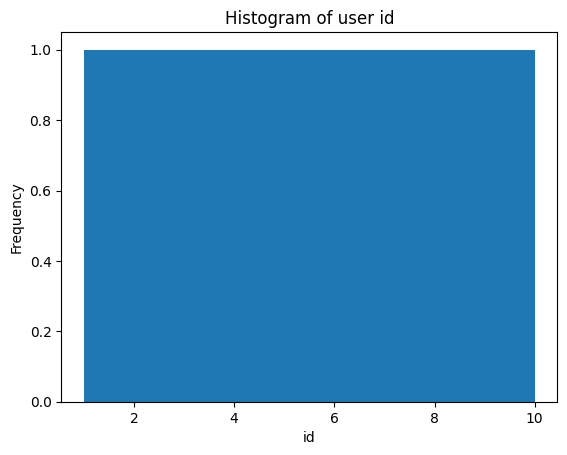

In [148]:
import matplotlib.pyplot as plt

# User ID : Histogram
plt.hist(curated_users_df['id'])
plt.xlabel('id')
plt.ylabel('Frequency')
plt.title('Histogram of user id')
plt.show()

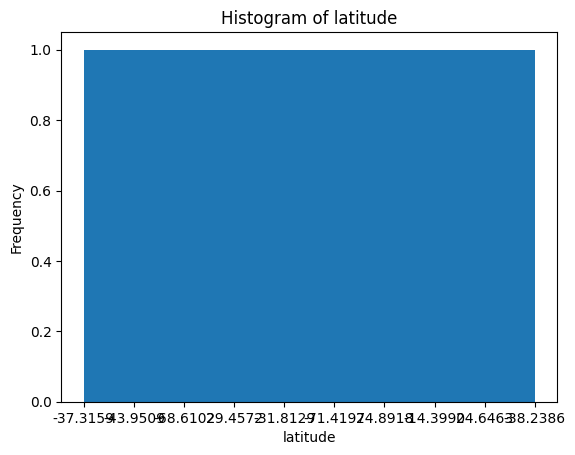

In [149]:
# latitude : Histogram
plt.hist(curated_users_df['latitude'])
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.title('Histogram of latitude')
plt.show()

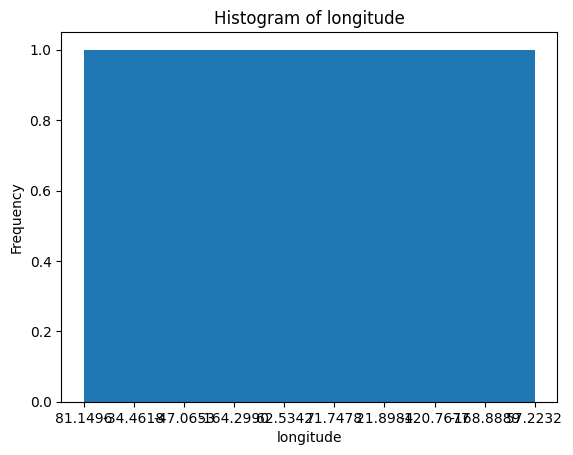

In [150]:
# longitude : Histogram
plt.hist(curated_users_df['longitude'])
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.title('Histogram of longitude')
plt.show()

In [151]:
# Merge Sales Data with User Data
sales_users_df = pd.merge(sales_df, curated_users_df, left_on='customer_id', right_on='id', how='left')
print(sales_users_df.head())

   order_id  customer_id  product_id  quantity  price order_date  id  \
0      2334            5          40         3  35.60 2022-06-21   5   
1      6228            8          13         7  36.52 2023-03-08   8   
2      7784            9          44         4  46.56 2023-04-22   9   
3      6588            5          26         1  15.87 2022-10-23   5   
4      5910            8          32        10  77.00 2022-10-05   8   

                       name       username                     email  \
0          Chelsey Dietrich         Kamren  Lucio_Hettinger@annie.ca   
1  Nicholas Runolfsdottir V  Maxime_Nienow      Sherwood@rosamond.me   
2           Glenna Reichert       Delphine   Chaim_McDermott@dana.io   
3          Chelsey Dietrich         Kamren  Lucio_Hettinger@annie.ca   
4  Nicholas Runolfsdottir V  Maxime_Nienow      Sherwood@rosamond.me   

   latitude  longitude  
0  -31.8129    62.5342  
1  -14.3990  -120.7677  
2   24.6463  -168.8889  
3  -31.8129    62.5342  
4  -14.39

In [152]:
# Check for missing values
missing_values = sales_users_df.isnull().sum()
print(missing_values)


order_id       0
customer_id    0
product_id     0
quantity       0
price          0
order_date     0
id             0
name           0
username       0
email          0
latitude       0
longitude      0
dtype: int64


In [153]:
import time
# Define your OpenWeatherMap API key
api_key = '83ac0cba25afe9820ee263f50de30f4e'
# Define a function to fetch weather data for a given latitude and longitude and temperature will be returned in celcuis degree
# add try and except to sleep in case the API hits exceeded the 1 minute limit
def get_weather_data(latitude, longitude,weather_id):
    base_url = 'https://api.openweathermap.org/data/2.5/weather?'
    params ='lat='+latitude+'&lon='+longitude+'&units=metric'+'&appid='+api_key
    retries = 0
    while retries <= 1000 :
      try :
        print(params)
        response = requests.get(base_url+params)
        if response.status_code == 200:
          weather_data = response.json()
          temperature = weather_data.get('main', {}).get('temp', None)
          weather_conditions = weather_data.get('weather', [])[0].get('description', None)
          return temperature, weather_conditions,weather_id,weather_id,weather_data.get('coord', {}),weather_data.get('weather', [])[0],weather_data.get('base', {}),weather_data.get('main', {}),weather_data.get('visibility', {}),weather_data.get('wind', {}),weather_data.get('clouds', {}),weather_data.get('dt', {}),weather_data.get('sys', {}),weather_data.get('timezone', {}),weather_data.get('id', {}),weather_data.get('name', {}),weather_data.get('cod', {})


        else:
          return None, None,None,None
      except Exception as e:
        print("sleep for 60 secs ")
        time.sleep(60)
        retries = retries + 1
    return None, None,None,None

In [ ]:
weather_df=sales_users_df[['order_id']]
weather_df.rename(columns={'order_id': 'id'})
# Apply the get_weather_data function to your DataFrame to fetch weather information
sales_users_df['temperature'], sales_users_df['weather_conditions'],sales_df['weather_id'],weather_df['id'],weather_df['coord'],weather_df['weather'],weather_df['base'],weather_df['main'],weather_df['visibility'],weather_df['wind'],weather_df['clouds'],weather_df['dt'],weather_df['sys'],weather_df['timezone'],weather_df['id'],weather_df['name'],weather_df['cod'] = zip(*sales_users_df.apply(lambda row: get_weather_data(row['latitude'], row['longitude'],row.name), axis=1))

# Display the updated DataFrame with weather information
print(sales_users_df.head())
print("--------------------------------------")
print(sales_df.head())
print("--------------------------------------")
print(weather_df.head())

lat=-31.8129&lon=62.5342&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-14.3990&lon=-120.7677&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=24.6463&lon=-168.8889&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-31.8129&lon=62.5342&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-14.3990&lon=-120.7677&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-68.6102&lon=-47.0653&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-38.2386&lon=57.2232&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=24.6463&lon=-168.8889&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-31.8129&lon=62.5342&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=24.8918&lon=21.8984&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=-14.3990&lon=-120.7677&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=24.8918&lon=21.8984&units=metric&appid=83ac0cba25afe9820ee263f50de30f4e
lat=29.4572&lon=-164.2990&units=metric&appid=83ac0cba25afe9820ee263f5

In [ ]:
# Display the updated DataFrame with weather information
print(sales_users_df.head())
print("--------------------------------------")
print(sales_df.head())
print("--------------------------------------")
print(weather_df.head())

In [ ]:
# Create a new DataFrame with selected columns
flattened_weather_df = weather_df[['id']]

flattened_weather_df['lat'] = weather_df['coord'].apply(lambda x: x.get('lat', {}))
flattened_weather_df['lon'] = weather_df['coord'].apply(lambda x: x.get('lon', {}))
flattened_weather_df['description'] = weather_df['weather'].apply(lambda x: x.get('description', {}))
flattened_weather_df['weather_id'] = weather_df['weather'].apply(lambda x: x.get('id', {}))
flattened_weather_df['weather_main'] = weather_df['weather'].apply(lambda x: x.get('main', {}))
flattened_weather_df['weather_icon'] = weather_df['weather'].apply(lambda x: x.get('icon', {}))
flattened_weather_df['base'] = weather_df['base']
flattened_weather_df['temp'] = weather_df['main'].apply(lambda x: x.get('temp', {}))
flattened_weather_df['feels_like'] = weather_df['main'].apply(lambda x: x.get('feels_like', {}))
flattened_weather_df['temp_min'] = weather_df['main'].apply(lambda x: x.get('temp_min', {}))
flattened_weather_df['temp_max'] = weather_df['main'].apply(lambda x: x.get('temp_max', {}))
flattened_weather_df['pressure'] = weather_df['main'].apply(lambda x: x.get('pressure', {}))
flattened_weather_df['humidity'] = weather_df['main'].apply(lambda x: x.get('humidity', {}))
flattened_weather_df['sea_level'] = weather_df['main'].apply(lambda x: x.get('sea_level', {}))
flattened_weather_df['grnd_level'] = weather_df['main'].apply(lambda x: x.get('grnd_level', {}))

flattened_weather_df['visibility'] = weather_df['visibility']
flattened_weather_df['speed'] = weather_df['wind'].apply(lambda x: x.get('speed', {}))
flattened_weather_df['deg'] = weather_df['wind'].apply(lambda x: x.get('deg', {}))
flattened_weather_df['gust'] = weather_df['wind'].apply(lambda x: x.get('gust', {}))

flattened_weather_df['clouds'] = weather_df['clouds'].apply(lambda x: x.get('all', {}))

flattened_weather_df['dt'] = weather_df['dt']

flattened_weather_df['sunrise'] = weather_df['sys'].apply(lambda x: x.get('sunrise', {}))
flattened_weather_df['sunset'] = weather_df['sys'].apply(lambda x: x.get('sunset', {}))
flattened_weather_df['timezone'] = weather_df['timezone']
flattened_weather_df['city_id'] = weather_df['id']
flattened_weather_df['city_name'] = weather_df['name']
flattened_weather_df['cod'] = weather_df['cod']
print(flattened_weather_df.head())

In [ ]:
# Check for missing values
missing_values = sales_users_df.isnull().sum()
print(missing_values)


Data Manipulation and Aggregation

In [ ]:
# Calculate total sales amount per customer
total_sales_per_customer = sales_users_df.groupby('customer_id')['price'].sum()
print(total_sales_per_customer)

In [ ]:
# total sales per customer : Graph
plt.figure(figsize=(10, 6))
total_sales_per_customer.plot(kind='bar', rot=0)
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount Per Customer')
plt.show()

In [ ]:
# average order quantity per product
average_order_quantity_per_product = sales_users_df.groupby('product_id')['quantity'].mean()
print(average_order_quantity_per_product)

In [ ]:
# average order quantity per product : Graph
plt.figure(figsize=(10, 6))
average_order_quantity_per_product.plot(kind='bar', rot=0)
plt.xlabel('Product ID')
plt.ylabel('Average Order Quantity')
plt.title('Average Order Quantity Per Product')
plt.show()

In [ ]:
#Top-Selling Products by Quantity
top_selling_products = sales_users_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
print(top_selling_products)

In [ ]:
#Top-Selling Products Quantity : Graph top 10 selling
plt.figure(figsize=(10, 6))
top_selling_products.head(10).plot(kind='bar', rot=0)
plt.xlabel('Product ID')
plt.ylabel('Total Sales Quantity')
plt.title('Top-Selling Products (Descending Order)')
plt.show()

In [ ]:
#Top-Selling Products by Price
top_selling_products = sales_users_df.groupby('product_id')['price'].sum().sort_values(ascending=False)
print(top_selling_products)

In [ ]:
#Top-Selling Products Price : Graph top 10 selling
plt.figure(figsize=(10, 6))
top_selling_products.head(10).plot(kind='bar', rot=0)
plt.xlabel('Product ID')
plt.ylabel('Total Sales Price')
plt.title('Top-Selling Products (Descending Order)')
plt.show()

In [ ]:
#Top-Selling Customer by Price
top_selling_customer = sales_users_df.groupby('customer_id')['price'].sum().sort_values(ascending=False)
print(top_selling_customer)

In [ ]:
#Top-Selling customer Price : Graph top 10 selling
plt.figure(figsize=(10, 6))
top_selling_customer.head(10).plot(kind='bar', rot=0)
plt.xlabel('Product ID')
plt.ylabel('Total Sales Price')
plt.title('Top-Selling customer (Descending Order)')
plt.show()

In [ ]:
#Top-Selling Customer by Quantity
top_selling_customer = sales_users_df.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)
print(top_selling_customer)

In [ ]:
#Top-Selling Customer Quantity : Graph top 10 selling
plt.figure(figsize=(10, 6))
top_selling_customer.head(10).plot(kind='bar', rot=0)
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Quantity')
plt.title('Top-Selling Customers (Descending Order)')
plt.show()

In [ ]:
# Monthly Sales Trends Price
sales_users_df['order_date'] = pd.to_datetime(sales_users_df['order_date'])
monthly_sales = sales_users_df.groupby(sales_users_df['order_date'].dt.to_period('M'))['price'].sum()

In [ ]:
# Monthly Sales Trends Price : Graph
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Monthly Sales Trends Quantity
sales_users_df['order_date'] = pd.to_datetime(sales_users_df['order_date'])
monthly_sales = sales_users_df.groupby(sales_users_df['order_date'].dt.to_period('M'))['quantity'].sum()
print (monthly_sales)

In [ ]:
# Monthly Sales Trends Quantity : Graph
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Monthly Sales Trends Price
avg_sales_per_weather_condition = sales_users_df.groupby('weather_conditions')['price'].mean()
print(avg_sales_per_weather_condition)

In [ ]:
# Monthly Sales Trends Price
plt.figure(figsize=(10, 6))
avg_sales_per_weather_condition.plot(kind='bar', rot=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount Per Weather Condition')
plt.show()

In [ ]:
# Monthly Sales Trends quantity
avg_sales_per_weather_condition = sales_users_df.groupby('weather_conditions')['quantity'].mean()
print(avg_sales_per_weather_condition)

In [ ]:
# Monthly Sales Trends quantity
plt.figure(figsize=(10, 6))
avg_sales_per_weather_condition.plot(kind='bar', rot=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount Per Weather Condition')
plt.show()

In [ ]:
# Total Revenue Per Product
sales_users_df['total_revenue'] = sales_users_df['quantity'] * sales_users_df['price']
total_revenue_per_product = sales_users_df.groupby('product_id')['total_revenue'].sum()
print (total_revenue_per_product)

In [ ]:
# Total Revenue Per Product : Graph
plt.figure(figsize=(10, 6))
total_revenue_per_product.plot(kind='bar', rot=0)
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Per Product')
plt.show()

In [ ]:
#Sales by Day of the Week : Graph
sales_users_df['day_of_week'] = sales_users_df['order_date'].dt.day_name()
sales_by_day_of_week = sales_users_df.groupby('day_of_week')['price'].sum()
print(sales_by_day_of_week)

In [ ]:
#Sales by Day of the Week : Graph
plt.figure(figsize=(10, 6))
sales_by_day_of_week.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.title('Sales by Day of the Week')
plt.show()

In [ ]:
# Segment customers based on their order frequency
def customer_segmentation(row):
    if row['order_frequency'] <= pd.Timedelta(days=30):
        return 'New Customer'
    elif pd.Timedelta(days=30) < row['order_frequency'] <= pd.Timedelta(days=90):
        return 'Returning Customer'
    else:
        return 'Loyal Customer'
sales_users_df.sort_values(by=['customer_id', 'order_date'], inplace=True)
sales_users_df['order_frequency'] = sales_users_df.groupby('customer_id')['order_date'].diff()
sales_users_df['customer_segment'] = sales_users_df.apply(customer_segmentation, axis=1)
customer_segment_counts = sales_users_df['customer_segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segmentation')
plt.show()

